# 线性代数基础教程

**学习目标**:
1. 掌握矩阵基本运算
2. 理解特征值和特征向量
3. 学会应用PCA降维
4. 理解线性代数在机器学习中的应用

**预计时间**: 25分钟

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print('✅ 库导入完成！')

✅ 库导入完成！


## 第一部分: 矩阵运算

In [2]:
# 创建矩阵
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print('矩阵A:')
print(A)
print('\n矩阵B:')
print(B)

# 基本运算
print('\n=== 基本运算 ===')
print('\nA + B (加法):')
print(A + B)

print('\nA * 2 (数乘):')
print(A * 2)

print('\nA @ B (矩阵乘法):')
print(A @ B)

print('\nA.T (转置):')
print(A.T)

print(f'\n行列式 det(A) = {np.linalg.det(A):.2f}')
print(f'\n逆矩阵 A^(-1):')
print(np.linalg.inv(A))

矩阵A:
[[1 2]
 [3 4]]

矩阵B:
[[5 6]
 [7 8]]

=== 基本运算 ===

A + B (加法):
[[ 6  8]
 [10 12]]

A * 2 (数乘):
[[2 4]
 [6 8]]

A @ B (矩阵乘法):
[[19 22]
 [43 50]]

A.T (转置):
[[1 3]
 [2 4]]

行列式 det(A) = -2.00

逆矩阵 A^(-1):
[[-2.   1. ]
 [ 1.5 -0.5]]


## 第二部分: 特征值与特征向量

In [3]:
# 创建对称矩阵（更容易理解）
C = np.array([[4, 2], [2, 3]])

# 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(C)

print('矩阵C:')
print(C)
print(f'\n特征值: {eigenvalues}')
print(f'\n特征向量:')
print(eigenvectors)

# 验证 Cv = λv
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    lam = eigenvalues[i]
    Cv = C @ v
    lam_v = lam * v
    print(f'\n验证特征值{i+1} (λ={lam:.2f}):')
    print(f'Cv = {Cv}')
    print(f'λv = {lam_v}')
    print(f'相等? {np.allclose(Cv, lam_v)}')

矩阵C:
[[4 2]
 [2 3]]

特征值: [5.56155281 1.43844719]

特征向量:
[[ 0.78820544 -0.61541221]
 [ 0.61541221  0.78820544]]

验证特征值1 (λ=5.56):
Cv = [4.38364617 3.4226475 ]
λv = [4.38364617 3.4226475 ]
相等? True

验证特征值2 (λ=1.44):
Cv = [-0.88523796  1.1337919 ]
λv = [-0.88523796  1.1337919 ]
相等? True


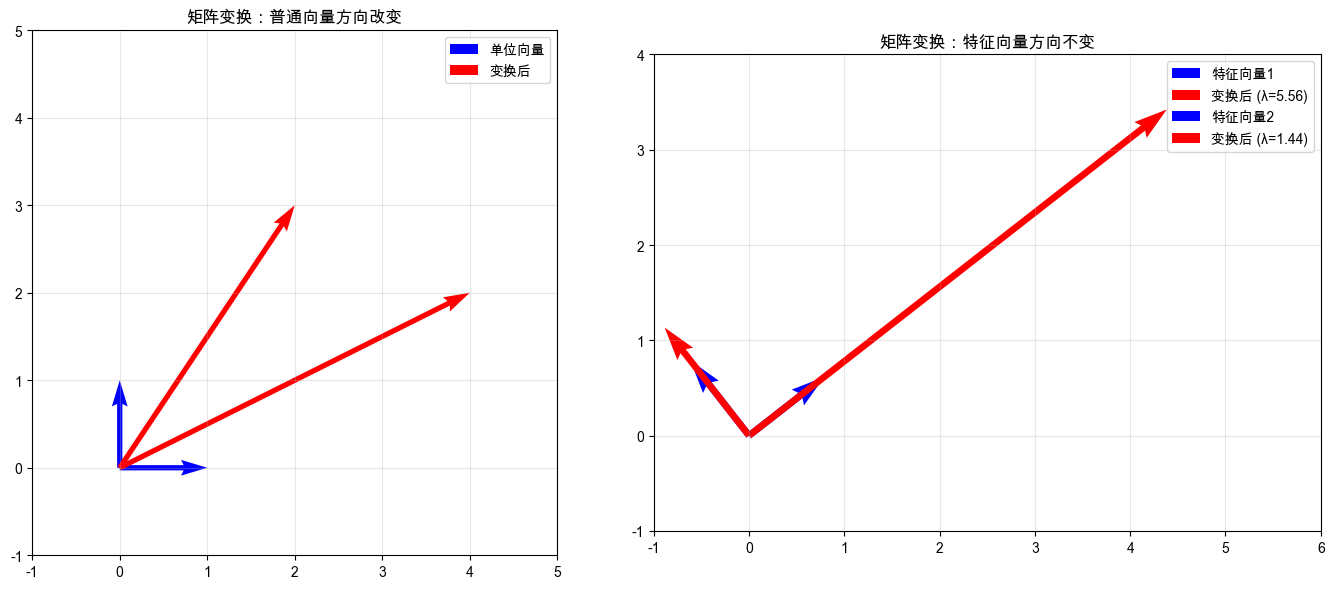

💡 特征向量的几何意义:
  - 矩阵变换后，特征向量的方向不变
  - 只是长度变为原来的λ倍（特征值）


In [4]:
# 可视化特征向量
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 左图：原始向量
ax = axes[0]
ax.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='blue', width=0.01, label='单位向量')
ax.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='blue', width=0.01)

# 变换后的向量
transformed = C @ np.array([[1, 0], [0, 1]]).T
ax.quiver(0, 0, transformed[0,0], transformed[1,0], angles='xy', scale_units='xy', scale=1, color='red', width=0.01, label='变换后')
ax.quiver(0, 0, transformed[0,1], transformed[1,1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)

ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_title('矩阵变换：普通向量方向改变', fontsize=12, fontweight='bold')

# 右图：特征向量
ax = axes[1]
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    lam = eigenvalues[i]
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.01, label=f'特征向量{i+1}')
    transformed_v = C @ v
    ax.quiver(0, 0, transformed_v[0], transformed_v[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01, label=f'变换后 (λ={lam:.2f})')

ax.set_xlim(-1, 6)
ax.set_ylim(-1, 4)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_title('矩阵变换：特征向量方向不变', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print('💡 特征向量的几何意义:')
print('  - 矩阵变换后，特征向量的方向不变')
print('  - 只是长度变为原来的λ倍（特征值）')

## 第三部分: PCA降维

### 3.1 手工实现PCA

协方差矩阵:
[[0.9589969  1.87728658]
 [1.87728658 3.92149969]]

特征值: [0.04894936 4.83154723]
特征向量:
[[-0.89984271 -0.43621451]
 [ 0.43621451 -0.89984271]]


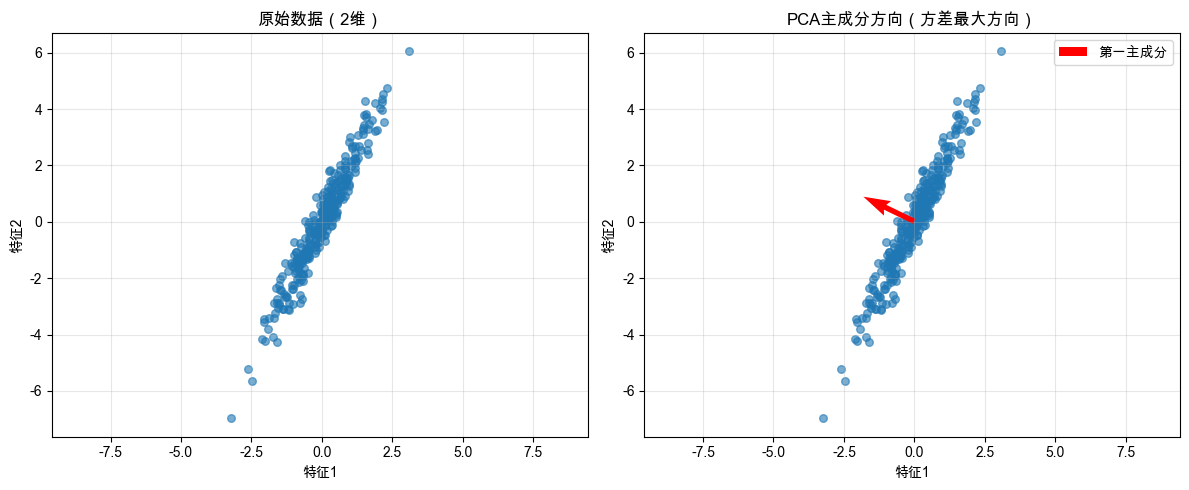


💡 第一主成分解释了 1.0% 的方差


In [5]:
# 生成2维数据
np.random.seed(42)
n_samples = 300

# 创建相关数据
X = np.random.randn(n_samples, 2)
X[:, 1] = X[:, 0] * 2 + np.random.randn(n_samples) * 0.5  # y与x相关

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=30)
plt.title('原始数据（2维）', fontsize=12, fontweight='bold')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.axis('equal')
plt.grid(True, alpha=0.3)

# 手工PCA步骤
# 1. 标准化
X_mean = X.mean(axis=0)
X_centered = X - X_mean

# 2. 计算协方差矩阵
cov_matrix = np.cov(X_centered.T)
print('协方差矩阵:')
print(cov_matrix)

# 3. 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f'\n特征值: {eigenvalues}')
print(f'特征向量:\n{eigenvectors}')

# 4. 选择主成分（第一主成分）
pc1 = eigenvectors[:, 0]

# 可视化主成分方向
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=30)
plt.quiver(X_mean[0], X_mean[1], pc1[0]*2, pc1[1]*2, 
           angles='xy', scale_units='xy', scale=1, color='red', width=0.01, label='第一主成分')
plt.title('PCA主成分方向（方差最大方向）', fontsize=12, fontweight='bold')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.axis('equal')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'\n💡 第一主成分解释了 {eigenvalues[0]/eigenvalues.sum()*100:.1f}% 的方差')

### 3.2 使用scikit-learn进行PCA

In [6]:
# 加载鸢尾花数据集
iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1).values
y = iris['species'].values

print(f'原始数据形状: {X.shape} (150个样本, 4个特征)')
print(f'特征名称: {iris.drop("species", axis=1).columns.tolist()}')

# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA降到2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f'\nPCA后数据形状: {X_pca.shape} (150个样本, 2个主成分)')
print(f'\n各主成分解释的方差比例:')
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f'  主成分{i+1}: {ratio*100:.2f}%')
print(f'  总计: {pca.explained_variance_ratio_.sum()*100:.2f}%')

原始数据形状: (150, 4) (150个样本, 4个特征)
特征名称: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

PCA后数据形状: (150, 2) (150个样本, 2个主成分)

各主成分解释的方差比例:
  主成分1: 72.96%
  主成分2: 22.85%
  总计: 95.81%


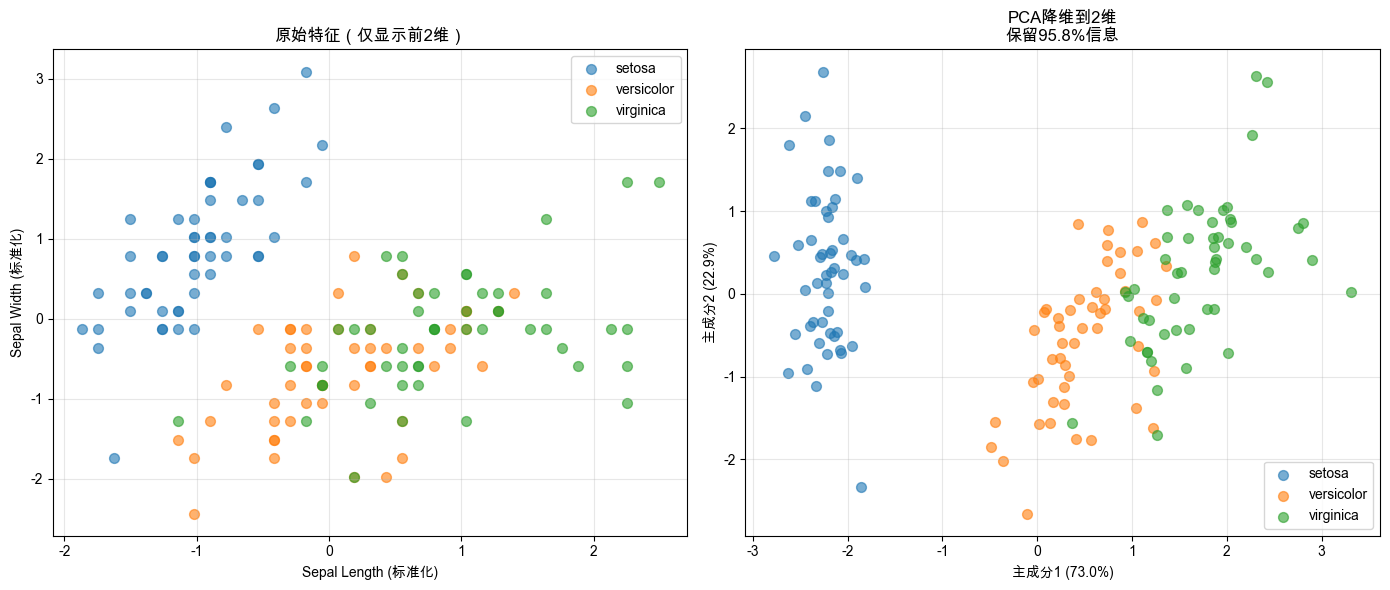

💡 观察: PCA后的数据更容易分离，保留了大部分信息


In [7]:
# 可视化降维结果
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 左图：前两个原始特征
for species in np.unique(y):
    mask = y == species
    axes[0].scatter(X_scaled[mask, 0], X_scaled[mask, 1], label=species, alpha=0.6, s=50)
axes[0].set_title('原始特征（仅显示前2维）', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sepal Length (标准化)')
axes[0].set_ylabel('Sepal Width (标准化)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 右图：PCA后的2维
for species in np.unique(y):
    mask = y == species
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1], label=species, alpha=0.6, s=50)
axes[1].set_title(f'PCA降维到2维\n保留{pca.explained_variance_ratio_.sum()*100:.1f}%信息', fontsize=12, fontweight='bold')
axes[1].set_xlabel(f'主成分1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'主成分2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('💡 观察: PCA后的数据更容易分离，保留了大部分信息')

### 3.3 选择主成分数量

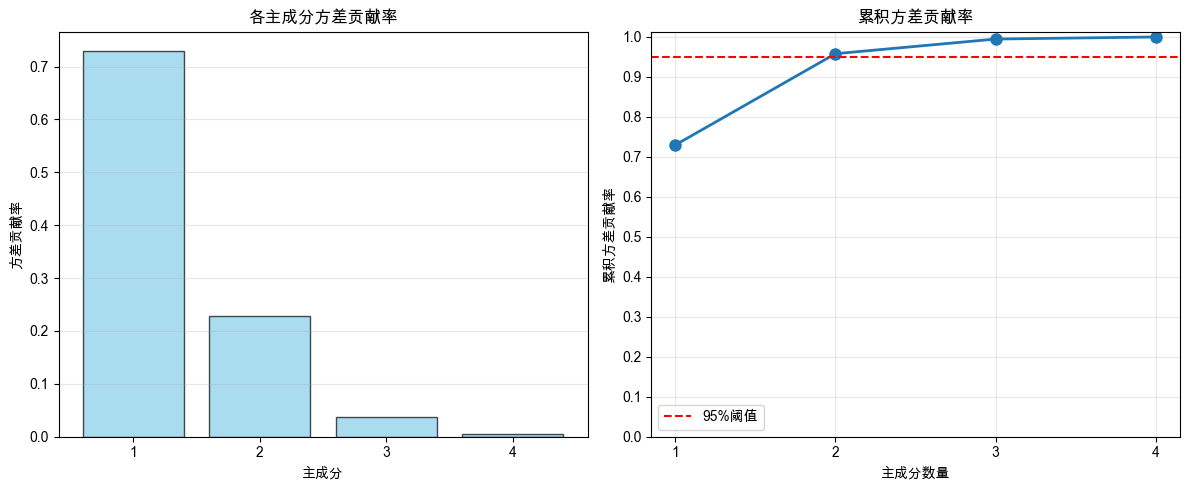

💡 选择主成分数量的建议:
  - 保留95%方差: 需要 2 个主成分
  - 保留99%方差: 需要 3 个主成分


In [8]:
# 计算所有主成分
pca_full = PCA()
pca_full.fit(X_scaled)

# 累积方差贡献率
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(12, 5))

# 左图：方差贡献率
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca_full.explained_variance_ratio_)+1), 
        pca_full.explained_variance_ratio_, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('各主成分方差贡献率', fontsize=12, fontweight='bold')
plt.xlabel('主成分')
plt.ylabel('方差贡献率')
plt.xticks(range(1, len(pca_full.explained_variance_ratio_)+1))
plt.grid(axis='y', alpha=0.3)

# 右图：累积方差贡献率
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumsum_var)+1), cumsum_var, marker='o', linewidth=2, markersize=8)
plt.axhline(0.95, color='red', linestyle='--', label='95%阈值')
plt.title('累积方差贡献率', fontsize=12, fontweight='bold')
plt.xlabel('主成分数量')
plt.ylabel('累积方差贡献率')
plt.xticks(range(1, len(cumsum_var)+1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('💡 选择主成分数量的建议:')
print(f'  - 保留95%方差: 需要 {np.argmax(cumsum_var >= 0.95) + 1} 个主成分')
print(f'  - 保留99%方差: 需要 {np.argmax(cumsum_var >= 0.99) + 1} 个主成分')

## 🎯 综合练习: 高维数据降维与可视化

原始数据形状: (300, 20)

2D PCA保留信息: 77.91%
3D PCA保留信息: 82.73%


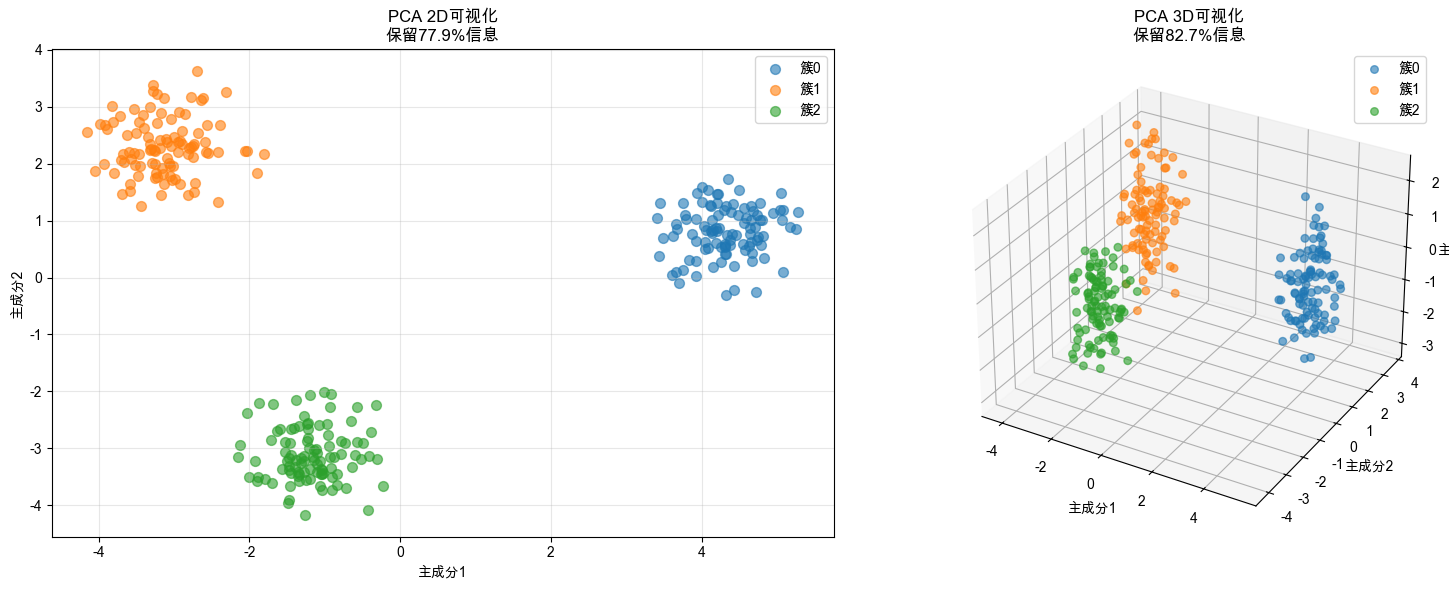


💡 应用场景:
  - 高维数据可视化
  - 数据压缩（减少存储空间）
  - 去噪（保留主要信息，去除噪声）
  - 加速机器学习算法（减少特征数）


In [9]:
# 生成高维数据
np.random.seed(42)
n_samples = 300
n_features = 20  # 20维数据

# 创建有结构的高维数据（3个簇）
from sklearn.datasets import make_blobs
X_high, y_true = make_blobs(n_samples=n_samples, n_features=n_features, 
                            centers=3, cluster_std=2.0, random_state=42)

print(f'原始数据形状: {X_high.shape}')

# 标准化
X_high_scaled = StandardScaler().fit_transform(X_high)

# PCA降维到2维和3维
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

X_pca_2d = pca_2d.fit_transform(X_high_scaled)
X_pca_3d = pca_3d.fit_transform(X_high_scaled)

print(f'\n2D PCA保留信息: {pca_2d.explained_variance_ratio_.sum()*100:.2f}%')
print(f'3D PCA保留信息: {pca_3d.explained_variance_ratio_.sum()*100:.2f}%')

# 可视化
fig = plt.figure(figsize=(16, 6))

# 2D可视化
ax1 = fig.add_subplot(121)
for cluster in np.unique(y_true):
    mask = y_true == cluster
    ax1.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1], 
                label=f'簇{cluster}', alpha=0.6, s=50)
ax1.set_title(f'PCA 2D可视化\n保留{pca_2d.explained_variance_ratio_.sum()*100:.1f}%信息', 
              fontsize=12, fontweight='bold')
ax1.set_xlabel('主成分1')
ax1.set_ylabel('主成分2')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 3D可视化
ax2 = fig.add_subplot(122, projection='3d')
for cluster in np.unique(y_true):
    mask = y_true == cluster
    ax2.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
                label=f'簇{cluster}', alpha=0.6, s=30)
ax2.set_title(f'PCA 3D可视化\n保留{pca_3d.explained_variance_ratio_.sum()*100:.1f}%信息', 
              fontsize=12, fontweight='bold')
ax2.set_xlabel('主成分1')
ax2.set_ylabel('主成分2')
ax2.set_zlabel('主成分3')
ax2.legend()

plt.tight_layout()
plt.show()

print('\n💡 应用场景:')
print('  - 高维数据可视化')
print('  - 数据压缩（减少存储空间）')
print('  - 去噪（保留主要信息，去除噪声）')
print('  - 加速机器学习算法（减少特征数）')

## 🎯 总结

### 核心知识点

1. **矩阵运算**:
   - 加法、数乘、矩阵乘法
   - 转置、逆矩阵、行列式
   - 机器学习=矩阵运算

2. **特征值与特征向量**:
   - Av = λv
   - 几何意义：方向不变，长度缩放
   - 应用：PCA、PageRank

3. **PCA降维**:
   - 找到数据方差最大的方向
   - 保留最重要的信息
   - 步骤：标准化→协方差矩阵→特征值分解→投影

4. **应用场景**:
   - 数据可视化（高维→2D/3D）
   - 特征降维（加速训练）
   - 数据压缩（减少存储）
   - 去噪（保留主信号）

### 下一步

- ✅ 完成练习
- 📚 学习 [Module M04 - 机器学习进阶](../../docs/stage3/04-ml-advanced/README.md)
- 🚀 应用到项目中

**恭喜完成线性代数基础！** 🎉

"线性代数是机器学习的语言" - 掌握它，你就能读懂AI的内部运作！